# TekCollection Test Harness  
### Thomas Ales | June 2020  
-----
Testing for TekCollection functionality.

In [1]:
import MapCollection

import matplotlib.pyplot as plt

In [2]:
data_dirs = [r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_000', r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_020', r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_040', r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_060', r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_080', r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_100',
r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_120', r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_140',
r'C:\Users\tka\source\repos\data\customer042\PostFix\TestScan_160']

In [3]:
test_collection = MapCollection.TekCollection(data_dirs, '')

In [4]:
test_collection.add_map()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\tka\\source\\repos\\data\\customer042\\PostFix\\000'

In [5]:
angles = ["0", "20", "40", "60", "80", "100", "120", "140", "160"]

In [6]:
# fix metadata
for idx, angle in enumerate(range(0, 101, 20)):
    test_collection.map_collections[idx].metadata["acq_angle"] = angle
    test_collection.map_collections[idx].metadata["sample_desc"] = "Test Sample"

for current in range(0, angles.__len__()):
    print("Processing Angle {0}".format(angles[current]))
    test_collection.map_collections[current].assemble_dcmap()
    print("Angle {0} DC assembly completed...".format(current))
    test_collection.map_collections[current].assemble_fftmap()
    print("Angle {0} FFT assembly completed...".format(current))
    test_collection.map_collections[current].assemble_velocitymap()
    print("Angle {0} velocity map assembly completed...".format(current))
    test_collection.map_collections[current].assemble_rf_voltagemap()
    print("Angle {0} RF Peak Voltage assembly completed...".format(current))
for current in range(0, test_collection.map_collections.__len__()):
    test_collection.map_collections[current].plot_dcmap()

    

IndexError: list index out of range

In [7]:
import pandas as pd
# Extract a few test pixels
wavespeeds = []
voltages = []
dcdf = []
vdf = []
startpoint = 1000
endpoint = 1010
for angle in range(0, test_collection.map_collections.__len__()):
    _dcmdf = pd.DataFrame(test_collection.map_collections[angle].dc_map)
    dcdf.append(_dcmdf)
    _veldf = pd.DataFrame(test_collection.map_collections[angle].velocity_map)
    vdf.append(_veldf)
    voltages.append(_dcmdf.iloc[:, startpoint:endpoint])
    wavespeeds.append(_veldf.iloc[:, startpoint:endpoint])

In [8]:
speeds = []
voltages = []
for idx, current in enumerate(wavespeeds):
    speeds.append(current.iloc[0][1002])
    voltages.append(dcdf[idx].iloc[0][1002])

In [9]:
plt.scatter(angles, speeds)
plt.ylim(2500, 3500)

ValueError: x and y must be the same size

In [10]:
from sklearn import preprocessing
voltseries = pd.Series(voltages)

In [11]:
import numpy as np
voltseries / np.linalg.norm(voltseries)

Series([], dtype: float64)

In [12]:
wavespeed_x = np.arange(2000, 3500, 1)

In [13]:
wavespeed_x

array([2000, 2001, 2002, ..., 3497, 3498, 3499])

In [14]:
amplitudes = test_collection.map_collections[0].waveforms[0][1].gaussian_model(wavespeed_x, 10, speeds[0], 10)

IndexError: list index out of range

In [15]:
speeds[0]

IndexError: list index out of range

In [16]:
def triangular_distribution(_xdata, _center, _ampltiude=1):
    _plateau = 5   # "Flat Spot" in m/s around center frequency
    _ramp = 50   # Slope for intensity falloff
    _ydata = []
    for value in _xdata:
        if(value > _center):
            _point = -0.02*(value - _center) + 1.0
            if(_point < 0):
                _ydata.append(0)
            elif(_point > 1):
                _ydata.append(0)
            else:
                _ydata.append(_point)
        else:
            _point = 0.02*(value-(_center)) + 1.0
            if(_point < 0):
                _ydata.append(0)
            elif(_point > 1):
                _ydata.append(0)
            else:
                _ydata.append(_point)
    return _ydata


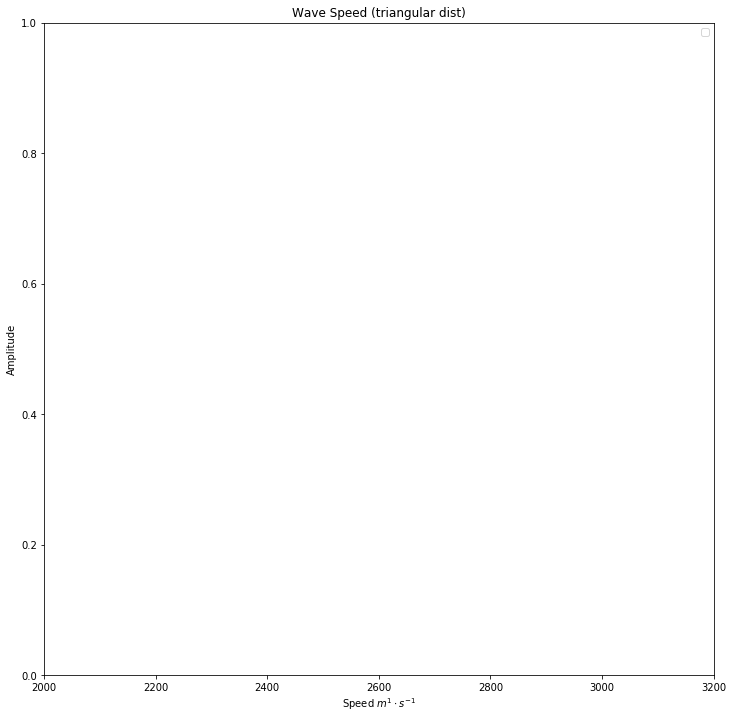

In [17]:
_testtriangle = []
plt.figure(figsize=[12,12])
plt.title("Wave Speed (triangular dist)")
plt.ylabel("Amplitude")
plt.xlabel("Speed $m^{1} \cdot s^{-1}$")
plt.xlim([2000, 3200])
for current in speeds:
    _testtriangle.append(triangular_distribution(wavespeed_x, current))
for current in _testtriangle:
    plt.plot(wavespeed_x, current)
plt.legend(speeds)

In [18]:
_testtriangle[0] = np.array(_testtriangle[0])

IndexError: list index out of range

In [19]:
_testtriangle[0].argmax()

IndexError: list index out of range

In [20]:
wavespeed_x[_testtriangle[0].argmax()]

IndexError: list index out of range

In [21]:
speeds[0]

IndexError: list index out of range